In [1]:
import numpy as np
import scipy
import random
from scipy.stats import multivariate_normal
from scipy.stats import norm
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
def gen_sample(n = 20, w=np.array([-.3,.5]), mu_noise = 0, sigma_noise = 0.2):
    X_0 = np.ones((2,n))
    X_0[1,:] = np.random.uniform(low=-1.0, high=1.0, size=(n))
    Y_0 = w @ X_0
    Z_0 = Y_0 + np.random.normal(loc=mu_noise, scale=sigma_noise, size=Y_0.shape)
    return X_0, Y_0, Z_0

In [3]:
w_t = np.array([-.3,.5])
beta = 1/25

In [4]:
prior = multivariate_normal(mean = np.zeros(2), cov = 2*np.eye(2))

In [5]:
def compute_posterior_mu_cov(cov_p, cov_l, x, y):
    cov_new = x @ np.linalg.inv(cov_l)@ x.T + np.linalg.inv(cov_p) 
    cov_new = np.linalg.inv(cov_new)
    mu_new  = cov_new @ x @ np.linalg.inv(cov_l) @ y
    return mu_new, cov_new

In [6]:
def heatmap_pdf(_pdf, True_point = None, grid_size = 100,
               likelihood = False,  title = 'Plz provide title'):
    grid_size = 300
    W_0, W_1 = np.meshgrid(np.linspace(-1, 1, grid_size), np.linspace(-1, 1, grid_size))
    W = np.concatenate((W_0.reshape(-1,1), W_1.reshape(-1,1)), axis = 1)
    m = W.shape[0]
    if not likelihood:
        P = _pdf.pdf(W).reshape(grid_size,grid_size)
    else:
        P = _pdf(W).reshape(grid_size,grid_size)
    
    plt.clf()
    plt.pcolormesh(W_0, W_1, P, cmap='jet',shading='auto')
    plt.colorbar()
    if True_point is not None:
        plt.plot(True_point[0], True_point[1],'b*')
                
    plt.xlabel("w_0")
    plt.ylabel("w_1")
    plt.title(title)
    plt.show()

In [7]:
def plot_lines(Sample, True_point = None, data = None, True_line = None, title = 'Plz provide title'):
    n = Sample.shape[0]
    X = np.ones((2,100))
    X[1,:] = np.linspace(-1, 1, 100)
    Y =  Sample @ X
    for i in range(n):
        x = X[1,:]
        y = Y[i, :]
        plt.plot(x, y, 'b-')
    if True_point is not None:
        plt.plot(True_point[0], True_point[1], 'r+')
    if data is not None:
        plt.plot(data[0], data[1], 'ro')
    if True_line is not None:
        x = X[1,:]
        y = True_line @ X
        valid_ind = (y<=1)*(y>=-1)
        plt.plot(x[valid_ind], y[valid_ind], 'g-', linewidth=4, label = "Ground Truth Line: y = -.3 + .5x")
        
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    if True_line is not None:
        plt.legend()
    plt.show()
    
    return 

In [8]:
X_s, Y_s, Y_hat_s = gen_sample()
X_s.shape, Y_s.shape, Y_hat_s.shape

((2, 20), (20,), (20,))

In [9]:
W_sample = prior.rvs(20)

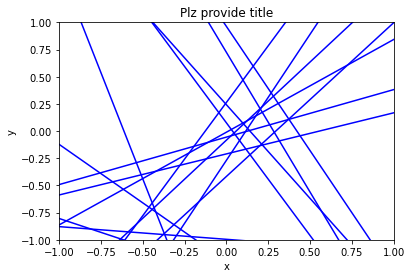

In [10]:
plot_lines(W_sample)

In [11]:
def return_posterior(n_sample):
    x = X_s[:, :n_sample]
    y = Y_hat_s[:n_sample]
    cov_p = .2 * np.eye(2)

    beta = 1/25
    cov_l = beta * np.eye(n_sample)
    m, c = compute_posterior_mu_cov(cov_p, cov_l, x, y)
    print('this is mu and cov for posterior with {} nubmer of samples'.format(n_sample))
    print(m,c)
    return multivariate_normal(mean = m, cov = c)

In [12]:
posterior = return_posterior(n_sample = 1)

this is mu and cov for posterior with 1 nubmer of samples
[-0.09630267 -0.01547873] [[ 0.03684579 -0.02622379]
 [-0.02622379  0.19578505]]


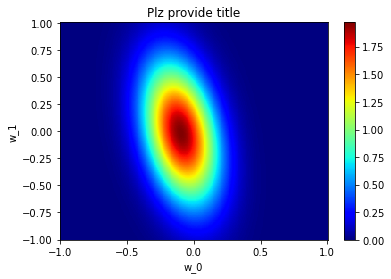

In [13]:
heatmap_pdf(posterior)

In [14]:
W_sample = posterior.rvs(20)

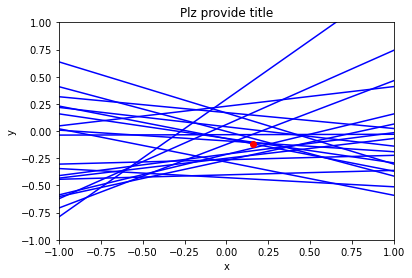

In [15]:
n_sample = 1
plot_lines(W_sample, data = [X_s[1, :n_sample], Y_hat_s[:n_sample]])

In [16]:
def plot_heatmap_posterior(n_sample, title = "plz provide title"):
    if n_sample ==0:
        _pdf = prior
    else:
        _pdf = return_posterior(n_sample)
    W_sample = _pdf.rvs(20)
    heatmap_pdf(_pdf, True_point = np.array([-.3,.5]), title = title)
    plot_lines(W_sample, data =[X_s[1, :n_sample], Y_hat_s[:n_sample]], 
               True_line = np.array([-.3,.5]), title = '20 lines sampled form '+title)

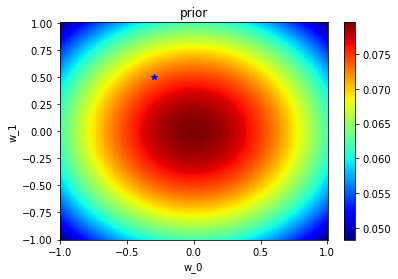

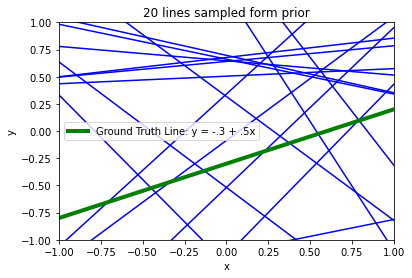

this is mu and cov for posterior with 1 nubmer of samples
[-0.09630267 -0.01547873] [[ 0.03684579 -0.02622379]
 [-0.02622379  0.19578505]]


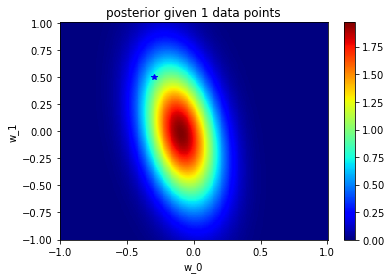

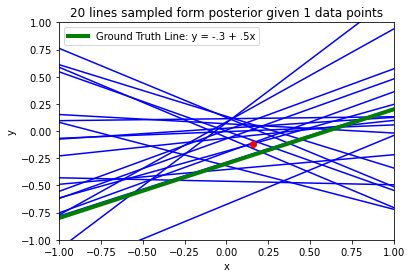

this is mu and cov for posterior with 2 nubmer of samples
[-0.05922021  0.20500141] [[ 0.03430475 -0.04133198]
 [-0.04133198  0.10595668]]


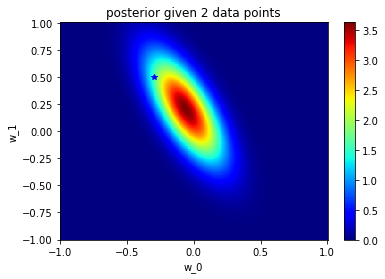

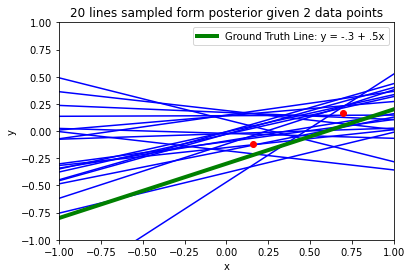

this is mu and cov for posterior with 5 nubmer of samples
[-0.14286727  0.42610391] [[ 0.00817504 -0.00511181]
 [-0.00511181  0.05413014]]


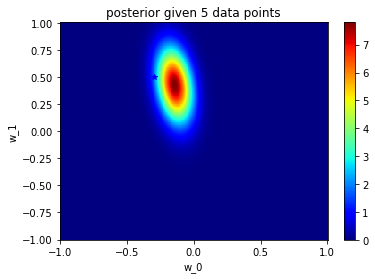

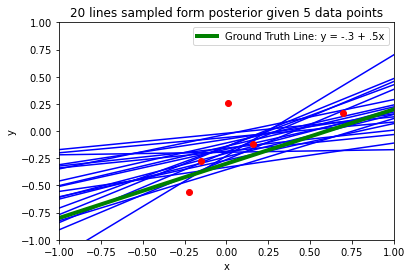

this is mu and cov for posterior with 20 nubmer of samples
[-0.23654566  0.45238796] [[ 0.00204578 -0.00065104]
 [-0.00065104  0.00646252]]


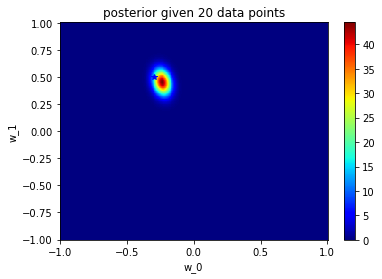

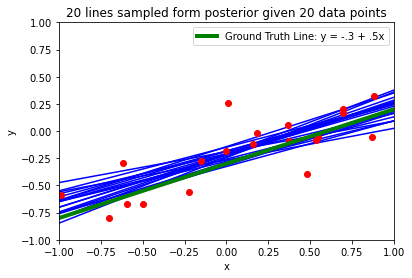

In [17]:
for i in [0,1,2,5,20]:
    plot_heatmap_posterior(n_sample=i, 
                           title = '{}'.format('prior' if i ==0 else 'posterior given {} data points'.format(i)))